In [108]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random

# Read File
data_set =pd.read_csv('housing.csv', sep=',')

# Split data set into training and test set
data_set_train, data_set_test = train_test_split(data_set, test_size=0.3)

# Validate
print(len(data_set_train))
print(len(data_set_test))

# Set seed (not necessary)
random.seed(1234)


354
152


In [109]:
# Function to split into x and y 

def split_x_y(data_set):
    data_set_x = data_set.iloc[:, :(len(data_set.columns)-1)]
    data_set_y = data_set.iloc[:, len(data_set.columns)-1:]
    return data_set_x, data_set_y


In [110]:
# Function to normalizr using Z-score

def z_score_norm(data_set_train_x,data_set_test_x):

    data_set_train_norm_x = data_set_train_x.copy()
    data_set_test_norm_x = data_set_test_x.copy()

    for column in data_set_train_norm_x.columns:
        data_set_train_norm_x[column] = (data_set_train_x[column] - data_set_train_x[column].mean()) / data_set_train_x[column].std()
        data_set_test_norm_x[column] = (data_set_test_x[column] - data_set_train_x[column].mean()) / data_set_train_x[column].std()

    return data_set_train_norm_x,data_set_test_norm_x
  


In [111]:
# Add intercept to the matrix for the matrix multiplications
def add_intercept(data_set_train_norm_x,data_set_test_norm_x):
    data_set_train_norm_x.insert(0,'intercept',1)
    data_set_test_norm_x.insert(0,'intercept',1)
    return data_set_train_norm_x,data_set_test_norm_x

In [112]:
# Risk function (MSE)
def risk_function(data_set_train_norm_x, data_set_train_y,w):
    Y_pred = data_set_train_norm_x.dot(w)
    err_sub = np.subtract(Y_pred, data_set_train_y)
    risk = np.sqrt(err_sub.T.dot(err_sub)/data_set_train_norm_x.shape[0]).values
    return err_sub,risk


In [113]:
def gradient_descent(data_set_train_norm_x,data_set_train_y,learning_rate_ , max_iter_, tolerance_):

    col_num = len(data_set_train_norm_x.columns)
    w = np.zeros((col_num,1))
    learning_rate = learning_rate_
    max_iter = max_iter_
    difference = 1
    tolerance = tolerance_
    iteration = 0

    # Loop for gradient
    while  float(difference) > tolerance and  iteration < max_iter:

        # calculate risk for w
        err_sub,risk_old = risk_function(data_set_train_norm_x, data_set_train_y,w)
        gradient=(2/len(data_set_train_norm_x))* data_set_train_norm_x.T.dot(err_sub)
        # update w
        w = w - learning_rate * gradient
        # calculate risk for updated w
        err_sub_new,risk_new = risk_function(data_set_train_norm_x, data_set_train_y,w)
        # take the difference of updated and old risk to continue while loop
        difference = np.abs(np.subtract(risk_new,risk_old))
        iteration = iteration+1
    
    return w

In [114]:
# Data Wrangling

# Split training and test data set into x and y

data_set_train_x, data_set_train_y = split_x_y(data_set_train)
data_set_test_x, data_set_test_y = split_x_y(data_set_test)

# Normalize data set using Z-score
data_set_train_norm_x,data_set_test_norm_x = z_score_norm(data_set_train_x,data_set_test_x)

# Add intercept to the matrix
data_set_train_norm_x,data_set_test_norm_x = add_intercept(data_set_train_norm_x,data_set_test_norm_x)

# Validate
print(len(data_set_train_norm_x))
print(len(data_set_test_norm_x))
#print(data_set_train_norm_x)
#print(data_set_test_norm_x)

354
152


In [115]:
# First method to find w : Gradient Descent
w = gradient_descent(data_set_train_norm_x,data_set_train_y,learning_rate_ = 0.05, max_iter_= 100, tolerance_ = 0.5e-10)
print(w)

                   0
intercept  22.250256
X1         -0.403689
X2          0.854818
X3          0.001218
X4          0.647333
X5         -1.459112
X6          2.816710
X7         -0.368527
X8         -2.591806
X9          1.291803
X10        -0.968902
X11        -1.924035
X12         1.153049
X13        -3.377869


In [116]:
# Predict y's using w found by gradient descent
data_set_train_y_hat = data_set_train_norm_x.dot(w)


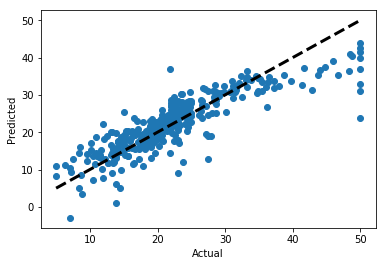

In [117]:
# Plot actual vs predicted values
fig, ax = plt.subplots()
ax.scatter(data_set_train_y, data_set_train_y_hat)
ax.plot([data_set_train_y.min(), data_set_train_y.max()], [data_set_train_y.min(), data_set_train_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()


In [118]:
# Second Method to find find w : Linear Algebra

wMLE = inv(data_set_train_norm_x.T.dot(data_set_train_norm_x)).dot(data_set_train_norm_x.T).dot(data_set_train_y)
print(wMLE)

[[22.25084746]
 [-0.57656074]
 [ 1.07873542]
 [ 0.44804269]
 [ 0.58103734]
 [-1.81806688]
 [ 2.64565815]
 [-0.26615876]
 [-2.86229085]
 [ 2.46253803]
 [-2.18280963]
 [-2.00845572]
 [ 1.13847823]
 [-3.4468957 ]]


In [119]:
# Predict y's using w found by linear algebra
data_set_train_y_hat = data_set_train_norm_x.dot(wMLE)

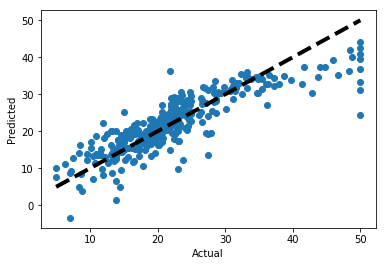

In [120]:
# Plot actual vs predicted values
fig, ax = plt.subplots()
ax.scatter(data_set_train_y, data_set_train_y_hat)
ax.plot([data_set_train_y.min(), data_set_train_y.max()], [data_set_train_y.min(), data_set_train_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()


In [121]:
# Evaluation

# Calculate RMSE
# RMSE of training using gradient descent

err_sub,rmse_train_gradient = risk_function(data_set_train_norm_x, data_set_train_y,w)
print('RMSE of training data set using gradient descent is :',rmse_train_gradient)

# RMSE of training using linear algebra
err_sub,rmse_train_la = risk_function(data_set_train_norm_x, data_set_train_y,wMLE)
print('RMSE of training data set using linear algebra is :',rmse_train_la)



RMSE of training data set using gradient descent is : [[4.54665868]]
RMSE of training data set using linear algebra is : [[4.52029145]]


In [122]:
# Calculate RMSE of test
err_sub,rmse_test_gradient = risk_function(data_set_test_norm_x, data_set_test_y,w)
print('RMSE of test data set using gradient descent is :',rmse_test_gradient)

# RMSE of test using linear algebra
err_sub,rmse_test_la = risk_function(data_set_test_norm_x, data_set_test_y,wMLE)
print('RMSE of test data set using linear algebra is :', rmse_test_la)


RMSE of test data set using gradient descent is : [[5.15777884]]
RMSE of test data set using linear algebra is : [[5.10634318]]
